# Logistic Regression



In this exercise, we will use logistic regression model to predict and estimate the probability of our classification task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Logistic Regression
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the *logistic sigmoid function* to return a probability value which can then be mapped to two or more discrete classes.

## Types of logistic regression
Logistic regression can become different types of classifiers:

* Binary (True/False, Cancer/No-Cancer, Pass/Fail, ...)
* Multi (Cats, Dogs, Other, ...)
* Ordinal (Low, Medium, High)


## Sigmoid Activation Function
To map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

$S(z) = \frac{1} {1 + e^{-z}}$

* $s(z)$ = output between 0 and 1 (probability estimate)
* $z$ = input to the function (your algorithm’s prediction - e.g., $wX + b$)
* $e$ = base of natural log

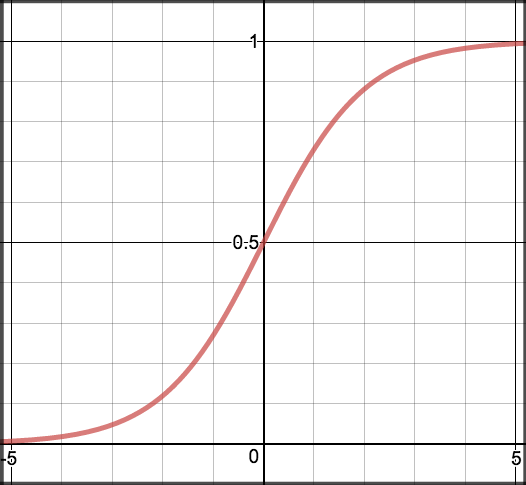

# Binary Classification

## Decision boundary
The sigmoid prediction function returns a *probability score* between 0 and 1. 
To map this to a discrete class (true/false, cat/dog), we must select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.

$$\begin{split}p \geq 0.5, class=1 \\
p < 0.5, class=0\end{split}$$

For example, if our threshold was .5 and our prediction function returned .7, we would classify this observation as positive. If our prediction was .2 we would classify the observation as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.

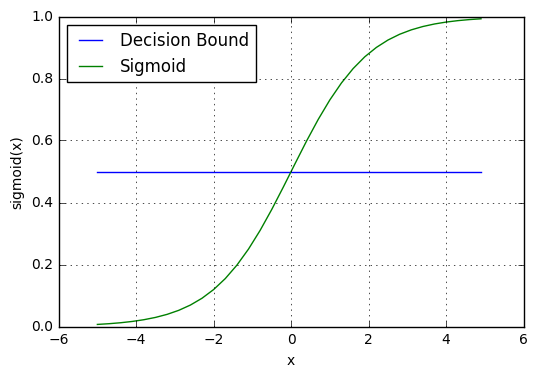

## Marking Predictions

For predctions, the linear regression output passes through the sigmoid function: 

$P(class=1) = \frac{1} {1 + e^{-z}}$

If the model returns .4 it believes there is only a 40% chance of passing. If our decision boundary was .5, we would categorize this observation as "False".

## Cost Function

We can't use the Mean Squared Error (MSE) to train a logistic regression.
So instead, we need to use function called **Cross-Entropy** or **Log Loss**:

Cross-entropy loss can be divided into two separate cost functions: one for $y=1$ and one for $y=0$.

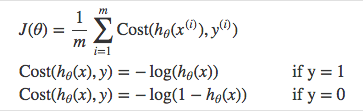

The benefits of taking the logarithm reveal themselves when you look at the cost function graphs for y=1 and y=0. These smooth monotonic functions (always increasing or always decreasing) make it easy to calculate the gradient and minimize cost. 

This Image from [Andrew Ng’s slides on logistic regression](https://www.youtube.com/watch?v=-la3q9d7AKQ).

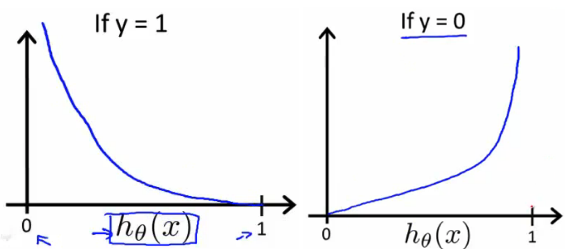

---

Let's determine the chances of getting a heart attack 😞

This original database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 

The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Here it is simplified to a binary classification - whether risk exists (1) or not (0).

The features here are:

1. age - the patient's age
2. sex - the patient's gender
3. cp - chest pain type (4 values):
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain
  * Value 4: asymptomatic
4. resting blood pressure (in mm Hg)
5. chol: cholestoral in mg/dl fetched via BMI sensor
6. fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2):
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalac: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal rate - 3 = normal; 6 = fixed defect; 7 = reversable defect


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/heart_data.zip')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


Let's split the data to Train and Test set.

We will use the `target` column as the `y`, and he rest of the columns as our `X`

In [3]:
### Your turn ####
# Divide the data to train and test.
# X will be the columns without 'target'.
# y is the target column
# consider dropping n/a values too! 

X = df.drop(['target'], axis=1).dropna(axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.5, 
                                                    random_state=42)


reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))


clf = reg.fit(X_train, y_train)

In the scikit-learn implementation, everything is already done for us. 

In [4]:
reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf = reg.fit(X_train, y_train)

In [5]:
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        70
           1       0.83      0.83      0.83        82

    accuracy                           0.82       152
   macro avg       0.81      0.81      0.81       152
weighted avg       0.82      0.82      0.82       152



In [6]:
reg.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [7]:
reg.predict_proba(X_test)[:5]

array([[0.7376969 , 0.2623031 ],
       [0.20663597, 0.79336403],
       [0.40619749, 0.59380251],
       [0.99369043, 0.00630957],
       [0.04503663, 0.95496337]])

In [8]:
reg.predict_log_proba(X_test)[:5]

array([[-0.30422224, -1.33825457],
       [-1.57679663, -0.23147311],
       [-0.90091581, -0.52120849],
       [-0.00632956, -5.06568709],
       [-3.1002791 , -0.0460823 ]])

# Multi-Class classification

This dataset is just a simple toy dataset to practice logistic regression on.

The feature sets are:
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration

And the goal is to determine target:
* Drug type

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/drug200.csv')
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5c8a6b1d0>,
      dtype=object)

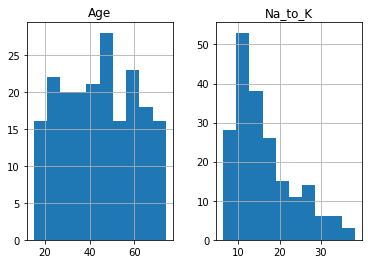

In [12]:
df.hist()

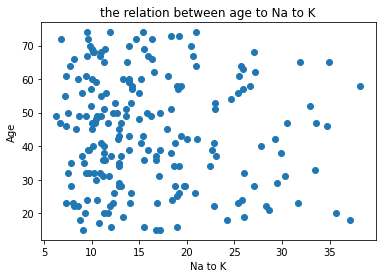

In [13]:
X = df['Na_to_K']
y = df['Age']

plt.scatter(X, y)
plt.title("the relation between age to Na to K")
plt.xlabel("Na to K")
plt.ylabel("Age")
plt.show()

In [14]:
# as always - we remove the target so that the model won't `look` at the 
# solutions... (cheating is not allowed here)
X = df.drop(['Drug'], axis=1).dropna(axis=1)
y = df['Drug']

Our Drug data is mixed: we have numerical values and categorical values.

If we try training a Logistic regression on it, we will get an error: Unlike the decision-tree, it expects ONLY numerical values - no categories.

So it is up to us to do some work here.

In [15]:
#### Your Turn ####
# Convert the categorical variables of the dataset X into numeric ones
# Here is a guide with several methods to assist you:
# https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/

categorical_cols = ['Sex', 'BP', 'Cholesterol']
for col in categorical_cols:
  # here's yet ANOTHER way - first we convert the column to a categorical type
  X[col] = X[col].astype('category')
  # then we replace the text value with the category-codes:
  X[col] = X[col].cat.codes


# just to see what we've done here, let's print X:
X.head()

####################

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [16]:
# let's split to train/test sets:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)


In [17]:
# Train our classifier:
reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf = reg.fit(X_train, y_train)

In [18]:
# and see how it predicts:
clf.predict(X_test)

array(['drugX', 'drugA', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'drugX', 'drugB', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'DrugY'], dtype=object)

In [19]:
### Your Turn ####
# Calculate a classification score of the classifier



print(classification_report(y_test, reg.predict(X_test)))



#################

              precision    recall  f1-score   support

       DrugY       0.96      0.85      0.90        26
       drugA       0.88      1.00      0.93         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      0.33      0.50         6
       drugX       0.82      1.00      0.90        18

    accuracy                           0.87        60
   macro avg       0.85      0.84      0.80        60
weighted avg       0.89      0.87      0.86        60



In [20]:
# let's do it again - with different ways of converting categorical cols - this 
# time to the one-hot-vector / dummies (0,1,0,0)
categorical_cols = ['Sex', 'BP', 'Cholesterol']

# 1. load data (just in case we changed it before)
df = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/drug200.csv')

# 2. process columns
X_dummies = df.drop(['Drug'], axis=1).dropna(axis=1)
y = df['Drug']


for col in categorical_cols:
  dummies = pd.get_dummies(X_dummies[col]) 
  X_dummies = pd.concat([X_dummies, dummies], axis='columns')
  X_dummies.drop(col, axis=1, inplace=True)

# 3. split data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dummies, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# 4. instantiate and train a classifier
reg_dummies = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf_dummies = reg_dummies.fit(X_train_d, y_train_d)

# 5. compare results
print(classification_report(y_test_d, reg_dummies.predict(X_test_d)))


              precision    recall  f1-score   support

       DrugY       1.00      0.88      0.94        26
       drugA       1.00      1.00      1.00         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         6
       drugX       0.95      1.00      0.97        18

    accuracy                           0.95        60
   macro avg       0.91      0.98      0.93        60
weighted avg       0.96      0.95      0.95        60



> So, which method is better? Time to compare the models!


In [21]:
from sklearn.metrics import matthews_corrcoef, f1_score

# first, my beloved MCC 
print(matthews_corrcoef(y_test, reg.predict(X_test)))
print(matthews_corrcoef(y_test, reg_dummies.predict(X_test_d)))

0.8172023535461674
0.932394600257177


In [22]:
# But are we sure the test set is the same? 
# Let's perform a paired t-Test (https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html)
sample_size = 50
average_scores_A = []
average_scores_B = []

# Model A
for i in range(sample_size):
  # we draw some samples - with replacement
  samples = X_test.sample(n=sample_size, replace=True)
  # calculate their predictions
  sample_predictions = reg.predict(samples) 
  # .index is the way to reach the matching row in our Y test data
  sample_targets = y_test[samples.index] 

  # calculate thSince we have multi-class targets, the F-Score is calculated for 
  # every class separately and therefore we have to average over the classes results 
  avg_f1 = f1_score(sample_predictions, sample_targets, average='macro')
  average_scores_A.append(avg_f1)

# Model B (dummies)
for i in range(sample_size):
  samples = X_test_d.sample(n=sample_size, replace=True)
  sample_predictions = reg_dummies.predict(samples) 
  sample_targets = y_test_d[samples.index] 

  avg_f1 = f1_score(sample_predictions, sample_targets, average='macro')
  average_scores_B.append(avg_f1)


In [23]:
# just so we can see the scores:
print(average_scores_A[:5])
print(average_scores_B[:5])

[0.9078174603174602, 0.7612787212787213, 0.8199134199134198, 0.8006451612903225, 0.7902947845804988]
[1.0, 0.9279710144927537, 0.8813034891375905, 0.8618618618618619, 0.9551219512195122]


Let's plug it into the t formula:

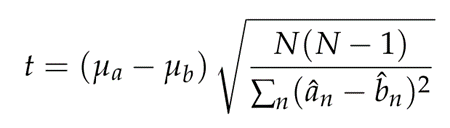

In [24]:
# We will use numpy since it makes calculations over vectors  easier:
import numpy as np

average_scores_A = np.array(average_scores_A)
average_scores_B = np.array(average_scores_B)


In [25]:
avg_err_A = average_scores_A.mean()
avg_err_B = average_scores_B.mean()

normalized_scores_A = average_scores_A - avg_err_A
normalized_scores_B = average_scores_B - avg_err_B

# we assume model B is better - so we subtract B - A:
mean_difference = avg_err_B - avg_err_A 
N_N1 = sample_size * (sample_size -1)
squared_sum = ((normalized_scores_B - normalized_scores_A)**2).sum()

t = mean_difference * np.sqrt(N_N1 / squared_sum)

In [26]:
t

9.587058993393988

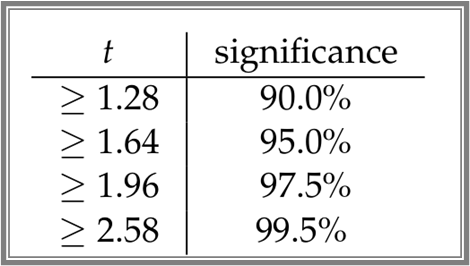

The value is (way) higher than 2.58, so if we had any doubts, 99.5% of the time we will use model B, it will be better then A.

---

Let's compare this classifier to another one:
The [Stochastic Gradient Descent Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier):

This time you are going to take control:
* Instantiate the classifier
* Train it on the drug type data
* Calculate its score with some metric and
* Compare the two models

Optional: Consider using K-Folds and perform t-test comparisson between the two models 

In [27]:
# Let's train an SGDClassifier (which by default is actually a linear SVM)
df = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/drug200.csv')

# 2. We will use again the dummy-way of processing the categorical columns
X_dummies = df.drop(['Drug'], axis=1).dropna(axis=1)
y = df['Drug']

for col in categorical_cols:
  dummies = pd.get_dummies(X_dummies[col]) 
  X_dummies = pd.concat([X_dummies, dummies], axis='columns')
  X_dummies.drop(col, axis=1, inplace=True)

# 3. split data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dummies, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# 4. instantiate and train a SGDClassifier
sgd_dummies = make_pipeline(StandardScaler(), SGDClassifier())
clf_sgd = sgd_dummies.fit(X_train_d, y_train_d)

# 5. compare results
print(classification_report(y_test_d, clf_sgd.predict(X_test_d)))


              precision    recall  f1-score   support

       DrugY       1.00      0.88      0.94        26
       drugA       0.88      1.00      0.93         7
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         6
       drugX       0.95      1.00      0.97        18

    accuracy                           0.95        60
   macro avg       0.91      0.98      0.94        60
weighted avg       0.96      0.95      0.95        60



And now let's compare the two

In [29]:
# with MCC 
print(matthews_corrcoef(y_test, sgd_dummies.predict(X_test_d)))
print(matthews_corrcoef(y_test, reg_dummies.predict(X_test_d)))

0.9319034447811109
0.932394600257177


The difference is quite tight (0.001%) - let's see if they have some statistical significance!

In [30]:
# Hypothesis: our logistic regression on the dummies (reg_dummies) is better 
# than the linear SVM (sgd) - sgd_dummies
# Let's test the hypothesis

sample_size = 50
average_scores_A = []
average_scores_B = []

# Model A (logistic regression on the dummies)
for i in range(sample_size):
  samples = X_test_d.sample(n=sample_size, replace=True)
  sample_predictions = reg_dummies.predict(samples) 
  sample_targets = y_test[samples.index] 

  avg_f1 = f1_score(sample_predictions, sample_targets, average='macro')
  average_scores_A.append(avg_f1)

# Model B (sgd on the dummies)
for i in range(sample_size):
  samples = X_test_d.sample(n=sample_size, replace=True)
  sample_predictions = sgd_dummies.predict(samples) 
  sample_targets = y_test_d[samples.index] 

  avg_f1 = f1_score(sample_predictions, sample_targets, average='macro')
  average_scores_B.append(avg_f1)


In [31]:
average_scores_A = np.array(average_scores_A)
average_scores_B = np.array(average_scores_B)

avg_err_A = average_scores_A.mean()
avg_err_B = average_scores_B.mean()

normalized_scores_A = average_scores_A - avg_err_A
normalized_scores_B = average_scores_B - avg_err_B

# we assume model B is better - so we subtract B - A:
mean_difference = avg_err_B - avg_err_A 
N_N1 = sample_size * (sample_size -1)
squared_sum = ((normalized_scores_B - normalized_scores_A)**2).sum()

t = mean_difference * np.sqrt(N_N1 / squared_sum)
print(t)

1.3162825745381774


So based on the table, we have a statistical significance of 90% that the logistic regression model performs better than the SGD (linear SVM) model. That is, in 90 times out of 100 the LogReg model would perform better.  